In [12]:
# Will need this to run plotly for interactive figures
#pip install plotly==5.18.0

In [13]:
import pandas as pd
import plotly.express as px
import seaborn as sns
# Load your dataset
data = pd.read_csv('Crimes_-_2022.csv')
# looking at null values
# our focus is only these variables:
data = data[['Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic']]
data = data.dropna()
print(" \nTotal number of missing values of each column: \n\n", data.isnull().sum())
data

 
Total number of missing values of each column: 

 Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
dtype: int64


,Primary Type,Description,Location Description,Arrest,Domestic
0,SEX OFFENSE,INDECENT SOLICITATION OF A CHILD,RESIDENCE,False,True
1,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True
2,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True
3,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False
4,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False
...,...,...,...,...,...
239049,CRIMINAL DAMAGE,TO VEHICLE,ALLEY,False,False
239050,STALKING,CYBERSTALKING,PARKING LOT / GARAGE (NON RESIDENTIAL),False,True
239051,THEFT,FROM BUILDING,COMMERCIAL / BUSINESS OFFICE,False,False
239052,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False


In [14]:
# for the pie charts
primary_type = data["Primary Type"]
arrests = data["Arrest"]
domestic = data["Domestic"]
location = data["Location Description"]


In [15]:
# for top crimes
num_crimes_type = primary_type.value_counts()
type = pd.DataFrame(data=num_crimes_type.index, columns=["Primary Type"])
type['values'] = num_crimes_type.values

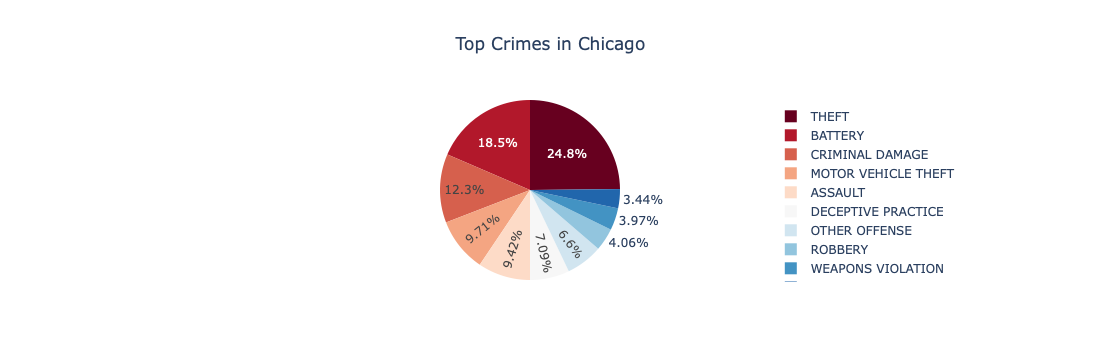

In [16]:
fig = px.pie(type[:10], values='values', names='Primary Type', title='Top Crimes in Chicago', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Top Crimes in Chicago',title_x=0.5,legend=dict(yanchor="top",y=0.99,xanchor="right",x=1.2),width=800)
fig.show()

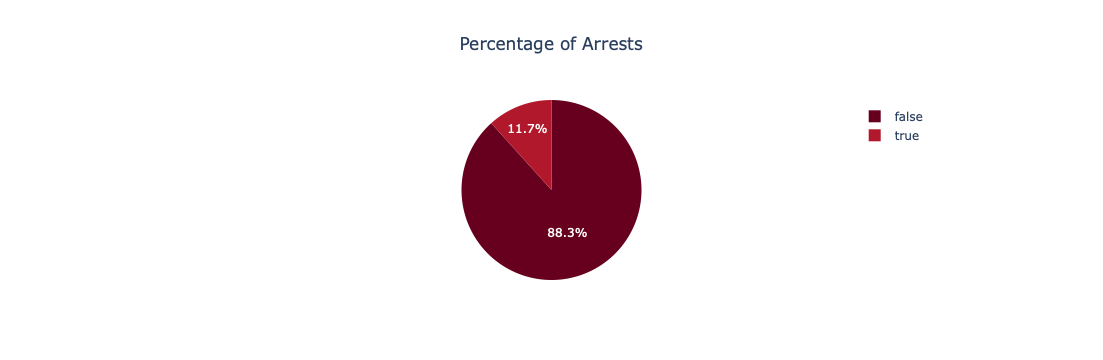

In [17]:
# for num of arrests
Num_arrests = arrests.value_counts()
type = pd.DataFrame(data=Num_arrests.index, columns=["Arrest"])
type['values'] = Num_arrests.values
fig = px.pie(type[:10], values='values', names='Arrest', title='Percentage of Arrests', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Percentage of Arrests', title_x=0.5)
fig.update_layout(legend=dict(yanchor="top",y=0.99,xanchor="right",x=0.90),width=800)
fig.show()

<Figure size 600x600 with 0 Axes>

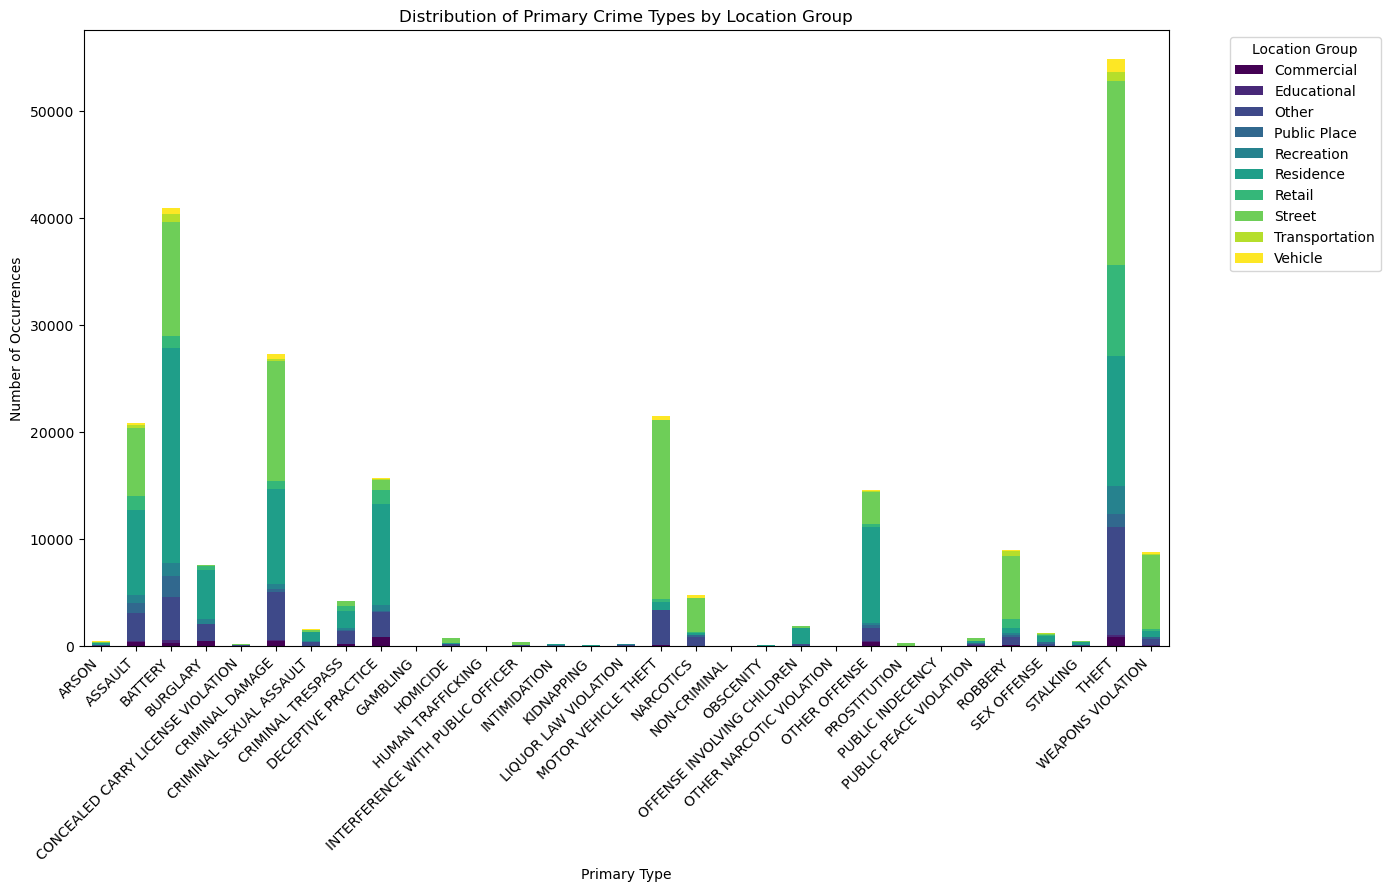

In [18]:
import matplotlib.pyplot as plt
location_groups = {
    'Residence': ['RESIDENCE', 'APARTMENT', 'RESIDENCE - PORCH / HALLWAY', 'HOUSE', 'CONDO'],
    'Street': ['STREET', 'SIDEWALK', 'ALLEY', 'BRIDGE', 'HIGHWAY / EXPRESSWAY'],
    'Commercial': ['COMMERCIAL / BUSINESS OFFICE', 'WAREHOUSE', 'VEHICLE - COMMERCIAL', 'WAREHOUSE', 'FACTORY / MANUFACTURING BUILDING'],
    'Public Place': ['SCHOOL - PUBLIC GROUNDS', 'SCHOOL - PUBLIC BUILDING', 'CTA PLATFORM', 'PARK PROPERTY', 'AIRPORT/AIRCRAFT'],
    'Vehicle': ['VEHICLE - COMMERCIAL', 'VEHICLE NON-COMMERCIAL', 'VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)', 'VEHICLE - DELIVERY TRUCK'],
    'Retail': ['SMALL RETAIL STORE', 'BANK', 'GAS STATION', 'DEPARTMENT STORE', 'CONVENIENCE STORE'],
    'Transportation': ['CTA BUS STOP', 'CTA BUS', 'CTA TRAIN', 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA', 'CTA STATION'],
    'Educational': ['SCHOOL - PRIVATE GROUNDS', 'SCHOOL - PRIVATE BUILDING', 'COLLEGE / UNIVERSITY - RESIDENCE HALL', 'COLLEGE / UNIVERSITY - GROUNDS'],
    'Recreation': ['BAR OR TAVERN', 'BARBERSHOP', 'RESTAURANT', 'ATHLETIC CLUB', 'BOWLING ALLEY'],
    'Other': ['OTHER (SPECIFY)', 'GOVERNMENT BUILDING / PROPERTY', 'NURSING / RETIREMENT HOME', 'ALLEY', 'OTHER RAILROAD PROPERTY / TRAIN DEPOT']
}
plt.figure(figsize=(6, 6))
data['Location Group'] = data['Location Description'].apply(lambda loc: next((group for group, locs in location_groups.items() if loc in locs), 'Other'))
crime_location_counts = data.groupby(['Primary Type', 'Location Group']).size().unstack().fillna(0)
crime_location_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Distribution of Primary Crime Types by Location Group')
plt.xlabel('Primary Type')
plt.ylabel('Number of Occurrences')
plt.legend(title='Location Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

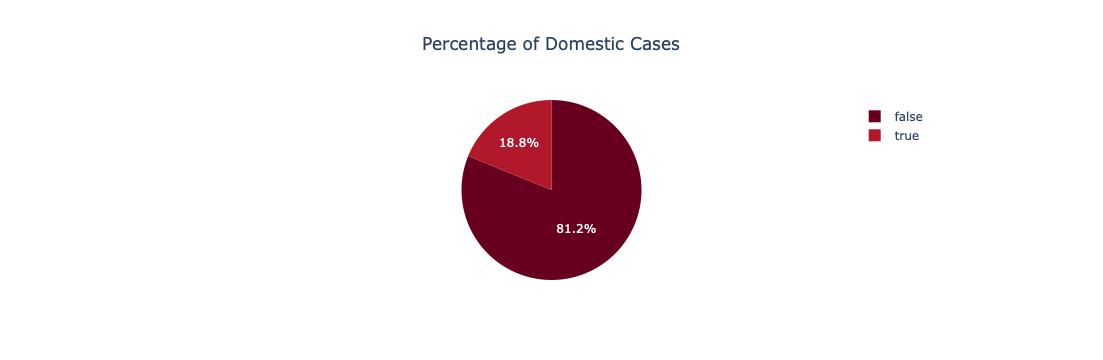

In [19]:
# num of domestic
num_domestic = domestic.value_counts()
type = pd.DataFrame(data=num_domestic.index, columns=["Domestic"])
type['values'] = num_domestic.values
fig = px.pie(type[:10], values='values', names='Domestic', title='Percentage of Domestic Cases', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Percentage of Domestic Cases', title_x=0.5)
fig.update_layout(legend=dict(yanchor="top",y=0.99,xanchor="right",x=0.90), width = 800)
fig.show()

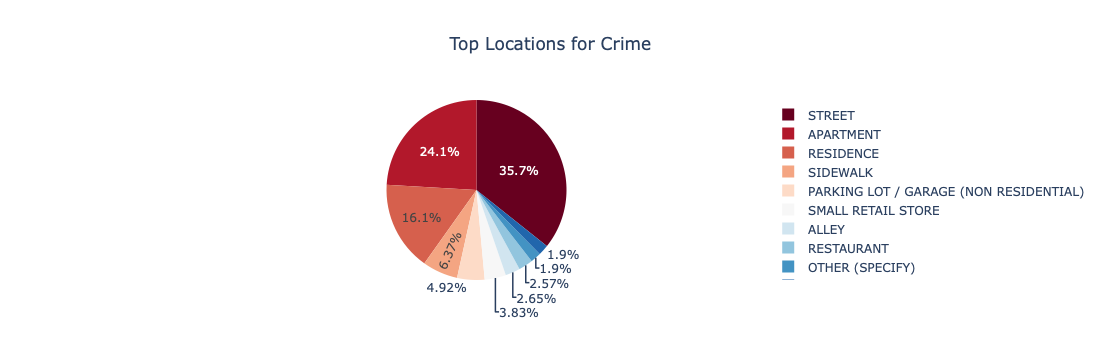

In [20]:
# top locations for crime
num_location = location.value_counts()
type = pd.DataFrame(data=num_location.index, columns=["Location Description"])
type['values'] = num_location.values
fig = px.pie(type[:10], values='values', names='Location Description', title='Top Locations for Crime', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Top Locations for Crime', title_x=0.5,width=800)
fig.show()

Logistic regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
# Selecting specific columns
selected_features = ['Description', 'Location Description', 'Arrest', 'Domestic']
target = 'Primary Type'
# Setting the features and the target variable
X = data[selected_features]
Y = data[target]
# # Encoding categorical values, need to do to make the machine learn from these variables
for column in X.columns:
    if X[column].dtype == 'object' or X[column].dtype == 'bool':
        X[column] = LabelEncoder().fit_transform(X[column])
# Encoding categorical values
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
# Splitting the data into training and testing sets
XTrain, XTest, yTrain, yTest = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)
# Training the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(XTrain, yTrain)
# Predicting on the test set
yPred = logistic_model.predict(XTest)
# Evaluating the model
accuracy = accuracy_score(yTest, yPred)
classification_report_output = classification_report(yTest, yPred)
# Now we finally have output so we can use this for presentation
print("Accuracy: ", accuracy*100)
print("Classification Report:\n", classification_report_output)


Accuracy:  25.913718904167105
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.00      0.00      0.00      4118
           2       0.56      0.46      0.51      8316
           3       0.00      0.00      0.00      1542
           4       0.03      0.06      0.04        34
           5       0.21      0.52      0.30      5382
           6       0.00      0.00      0.00       324
           7       0.00      0.00      0.00       837
           8       0.00      0.00      0.00      3240
          10       0.00      0.00      0.00       136
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00        71
          13       0.00      0.00      0.00        34
          14       0.00      0.00      0.00        17
          15       0.00      0.00      0.00        42
          16       0.00      0.00      0.00      4229
          17       0.00    

Logistic regression, though done on components of the data with binary states, did not provide a great fit. With an accuracy of 26%, the logistic regression provided low recall, precision, AND F1-scores, the last of which displaying low balance between recall and precision. Only a quarter of classes were correctly classified. Another model like an svm might perform a bit better.

SVM

In [23]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
# Selecting specific columns
selected_features = ['Description', 'Location Description', 'Arrest', 'Domestic']
target = 'Primary Type'
# Setting the features and the target vairiable
X = data[selected_features]
Y = data[target]
# Encoding categorical values, need to do to make the machine learn from these variables
for column in X.columns:
    if X[column].dtype == 'object' or X[column].dtype == 'bool':
        X[column] = LabelEncoder().fit_transform(X[column])
# Splitting the data into training and testing sets
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42)
# Training the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(XTrain, yTrain)
# Predicting on the test set
yPred = svm_model.predict(XTest)
# Evaluating the model
accuracy = accuracy_score(yTest, yPred)
classification_report = classification_report(yTest, yPred)
# Now we finally have output so we can use this for presentation
print("This is the accuracy of the model ", accuracy)
print("Here is a classification report", classification_report)

This is the accuracy of the model  0.690542668206151
Here is a classification report                                    precision    recall  f1-score   support

                            ARSON       0.00      0.00      0.00        93
                          ASSAULT       0.56      0.52      0.54      4118
                          BATTERY       0.67      0.78      0.72      8316
                         BURGLARY       0.00      0.00      0.00      1542
CONCEALED CARRY LICENSE VIOLATION       0.00      0.00      0.00        34
                  CRIMINAL DAMAGE       0.66      0.98      0.79      5382
          CRIMINAL SEXUAL ASSAULT       0.00      0.00      0.00       324
                CRIMINAL TRESPASS       0.00      0.00      0.00       837
               DECEPTIVE PRACTICE       0.50      0.72      0.60      3240
                         HOMICIDE       0.00      0.00      0.00       136
                HUMAN TRAFFICKING       0.00      0.00      0.00         5
 INTERFERENCE 

The SVM produced a learning model with an accuracy of 69%, much more accurate than the logistic regression model. While in genuine application falls short of ethically being able to “predict” crime, especially once applied to real individuals and real demographics, it can be used in general analysis to gain a broad understanding of what types of crime might be committed under certain conditions.